In [1]:
import os

folder_path = '/kaggle/input/kidney-stone-images'
files = os.listdir(folder_path)

print(files)  


['README.dataset.txt', 'README.roboflow.txt', 'data.yaml', 'valid', 'test', 'train']


In [2]:
train_folder = '/kaggle/input/kidney-stone-images/train'
files = os.listdir(train_folder)

print(files) 

['labels', 'images']


# **Saving the respective images and their txt files in the seprate folder** 

In [3]:
import os
import shutil

# Paths to the folders
train_images_path = "/kaggle/input/kidney-stone-images/train/images"
train_labels_path = "/kaggle/input/kidney-stone-images/train/labels"

# Output folder to save images and labels side by side (use /kaggle/working)
output_folder = "/kaggle/working/train_data_side_by_side"
os.makedirs(output_folder, exist_ok=True)

# Iterate through image files and match with labels
for image_file in os.listdir(train_images_path):
    if image_file.endswith(('.png', '.jpg', '.jpeg')):  # Ensure only image files are processed
        # Remove the file extension to find the corresponding label file
        base_name = os.path.splitext(image_file)[0]
        label_file = f"{base_name}.txt"
        
        # Check if the corresponding label file exists
        label_path = os.path.join(train_labels_path, label_file)
        image_path = os.path.join(train_images_path, image_file)
        
        if os.path.exists(label_path):
            # Create a subfolder for each image and label pair
            pair_folder = os.path.join(output_folder, base_name)
            os.makedirs(pair_folder, exist_ok=True)
            
            # Copy the image and label file to the subfolder
            shutil.copy(image_path, os.path.join(pair_folder, image_file))
            shutil.copy(label_path, os.path.join(pair_folder, label_file))
            
            print(f"Saved: {image_file} and {label_file} to {pair_folder}")
        else:
            print(f"Label file missing for image: {image_file}")

print("Processing complete. All paired files are saved side by side.")


Saved: 1-3-46-670589-33-1-63738098194098338000001-4837591316158809688_png_jpg.rf.6f038c8700c5fbb030c81d747e17efea.jpg and 1-3-46-670589-33-1-63738098194098338000001-4837591316158809688_png_jpg.rf.6f038c8700c5fbb030c81d747e17efea.txt to /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63738098194098338000001-4837591316158809688_png_jpg.rf.6f038c8700c5fbb030c81d747e17efea
Saved: 1-3-46-670589-33-1-63738372833226827900001-5207020487118708868_png_jpg.rf.0aa68a67b32a5a29e957dc516fb9b165.jpg and 1-3-46-670589-33-1-63738372833226827900001-5207020487118708868_png_jpg.rf.0aa68a67b32a5a29e957dc516fb9b165.txt to /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63738372833226827900001-5207020487118708868_png_jpg.rf.0aa68a67b32a5a29e957dc516fb9b165
Saved: 1-3-46-670589-33-1-63711492298782055400001-5639860124205224638_png_jpg.rf.112a9b66e37b071cb65477b04d578e4a.jpg and 1-3-46-670589-33-1-63711492298782055400001-5639860124205224638_png_jpg.rf.112a9b66e37b071cb65477b04d578e4a.txt t

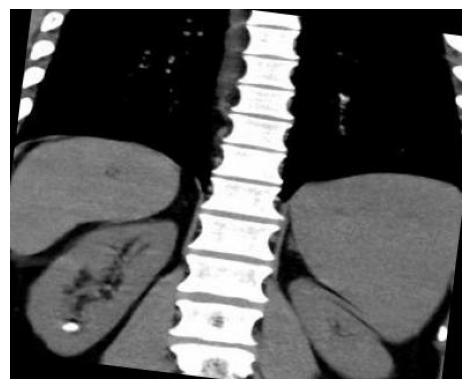

Label data for 1-3-46-670589-33-1-63738098194346352200001-4844140142406192925_png_jpg.rf.07aa40a72754a9956d256f9268b757ed.jpg:
0 0.13043478260869565 0.859375 0.043478260869565216 0.040625


In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the working directory where images and labels are saved side by side
working_directory = "/kaggle/working/train_data_side_by_side"

# Get the list of subfolders (which correspond to each image-label pair)
subfolders = [f for f in os.listdir(working_directory) if os.path.isdir(os.path.join(working_directory, f))]

# Select the first subfolder (pair)
first_pair_folder = subfolders[0]

# Get the image and label file names
image_file = [f for f in os.listdir(os.path.join(working_directory, first_pair_folder)) if f.endswith(('.png', '.jpg', '.jpeg'))][0]
label_file = [f for f in os.listdir(os.path.join(working_directory, first_pair_folder)) if f.endswith('.txt')][0]

# Get the full paths to the image and label
image_path = os.path.join(working_directory, first_pair_folder, image_file)
label_path = os.path.join(working_directory, first_pair_folder, label_file)

# Read the image using OpenCV
image = cv2.imread(image_path)

# Read the label text file
with open(label_path, 'r') as file:
    label_data = file.read()

# Display the image using matplotlib (Kaggle-friendly)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct colors
plt.axis('off')  # Hide axes
plt.show()

# Print the label data
print(f"Label data for {image_file}:\n{label_data}")


# **Image Pre Processing and Making Bounding Boxes with respect to annotations**

In [5]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Folder containing the images and annotations
image_folder = "/kaggle/working/train_data_side_by_side"
output_folder = "/kaggle/working/train_data_with_bboxes"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop through each folder (image + annotation pairs)
for folder in os.listdir(image_folder):
    folder_path = os.path.join(image_folder, folder)
    if os.path.isdir(folder_path):  # Process each sub-folder
        # Search for the image file (png, jpg, jpeg)
        image_file = None
        for ext in ['.png', '.jpg', '.jpeg']:
            possible_image_path = os.path.join(folder_path, f"{folder}{ext}")
            if os.path.exists(possible_image_path):
                image_file = possible_image_path
                break
        
        # If an image file is found
        if image_file:
            # Load the image
            image = cv2.imread(image_file)
            
            # Preprocess the image (normalize pixel values to range [0, 1])
            image = image.astype(np.float32) / 255.0
            
            # Read the annotation file (bbox data)
            label_path = os.path.join(folder_path, f"{folder}.txt")  # Assuming .txt format for labels
            with open(label_path, "r") as file:
                for line in file:
                    # Extract the class ID, center x, center y, width, and height
                    data = line.split()
                    class_id, x_center, y_center, width, height = map(float, data)
                    
                    # Convert normalized coordinates to pixel values
                    img_h, img_w = image.shape[:2]
                    x_center, y_center = int(x_center * img_w), int(y_center * img_h)
                    width, height = int(width * img_w), int(height * img_h)
                    
                    # Calculate top-left and bottom-right points for the bounding box
                    x1 = int(x_center - width / 2)
                    y1 = int(y_center - height / 2)
                    x2 = int(x_center + width / 2)
                    y2 = int(y_center + height / 2)
                    
                    # Draw the bounding box (no class text, just the box)
                    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            
            # Convert the image back to [0, 255] range for saving
            image = (image * 255).astype(np.uint8)
            
            # Save the image with bounding boxes
            output_image_path = os.path.join(output_folder, f"{folder}_bbox.png")
            cv2.imwrite(output_image_path, image)
            
           
print("Processing complete. Images with bounding boxes are saved in the output folder.")


Processing complete. Images with bounding boxes are saved in the output folder.


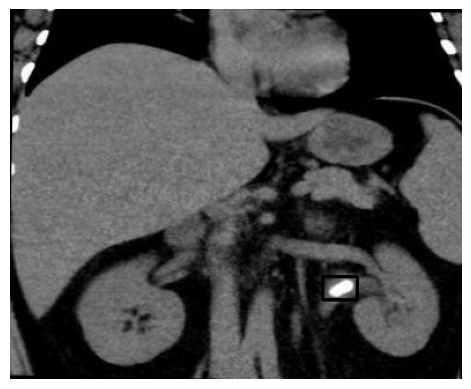

In [6]:
# Optional: Show the image with bounding boxes to verify (comment out if not needed)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



#cv2.imwrite(output_image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))


# **Splitting the Data**

In [7]:
source_folder = "/kaggle/working/train_data_side_by_side"
output_base = "/kaggle/working/split_data"  # Base folder to store splits
os.makedirs(output_base, exist_ok=True)


In [8]:
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Create subfolders for train, validation, and test splits
splits = ['train', 'val', 'test']
for split in splits:
    os.makedirs(os.path.join(output_base, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(output_base, split, "labels"), exist_ok=True)

In [9]:
image_files = []
label_files = []

# Iterate through subfolders in the source folder
for subfolder in os.listdir(source_folder):
    subfolder_path = os.path.join(source_folder, subfolder)

    # Check if it is a folder
    if os.path.isdir(subfolder_path):
        # List files in the subfolder
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)  # Full path to the file
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(file_path)  # Add image file path
            elif file.endswith('.txt'):
                label_files.append(file_path)  # Add label file path


In [10]:
print(f"Total images found: {len(image_files)}")
print(f"Total labels found: {len(label_files)}")


Total images found: 1054
Total labels found: 1054


In [11]:
import random  # Import the random module

data_pairs = []
for image_file in image_files:
    label_file = os.path.splitext(image_file)[0] + ".txt"  # Match the image with its label
    if label_file in label_files:
        data_pairs.append((image_file, label_file))

# Shuffle the data
random.shuffle(data_pairs)
print(len(data_pairs))

1054


In [12]:
for image_file in image_files:
    print("Inside for loop")
    label_file = os.path.splitext(image_file)[0] + ".txt"  # Expected label file name
    if label_file in label_files:
        print(f"Match found: {image_file} -> {label_file}")
        data_pairs.append((image_file, label_file))
    else:
        print(f"No match for: {image_file}")


Inside for loop
Match found: /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63738098194346352200001-4844140142406192925_png_jpg.rf.07aa40a72754a9956d256f9268b757ed/1-3-46-670589-33-1-63738098194346352200001-4844140142406192925_png_jpg.rf.07aa40a72754a9956d256f9268b757ed.jpg -> /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63738098194346352200001-4844140142406192925_png_jpg.rf.07aa40a72754a9956d256f9268b757ed/1-3-46-670589-33-1-63738098194346352200001-4844140142406192925_png_jpg.rf.07aa40a72754a9956d256f9268b757ed.txt
Inside for loop
Match found: /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63713643467379483900001-5393093154430431968_png_jpg.rf.f4167af33f410fb95f2c547bf965d119/1-3-46-670589-33-1-63713643467379483900001-5393093154430431968_png_jpg.rf.f4167af33f410fb95f2c547bf965d119.jpg -> /kaggle/working/train_data_side_by_side/1-3-46-670589-33-1-63713643467379483900001-5393093154430431968_png_jpg.rf.f4167af33f410fb95f2c547bf965d119/1-3-46-670589-3

In [13]:
total_count = len(data_pairs)
train_count = int(total_count * train_ratio)
val_count = int(total_count * val_ratio)
#print(total_count)

In [14]:
train_set = data_pairs[:train_count]
val_set = data_pairs[train_count:train_count + val_count]
test_set = data_pairs[train_count + val_count:]

In [15]:

print("Data split completed successfully!")
print(f"Train: {len(train_set)} samples")
print(f"Validation: {len(val_set)} samples")
print(f"Test: {len(test_set)} samples")

Data split completed successfully!
Train: 1475 samples
Validation: 421 samples
Test: 212 samples


# **TFRecord Format**

**For Better Training**

In [16]:
import tensorflow as tf
import os
import cv2
import numpy as np
from lxml import etree


In [17]:
# Function to create TFRecord example
def create_example(image_path, label_path):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = np.array(image)

    # Read labels (bounding boxes)
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Prepare bounding boxes and labels
    boxes = []
    labels = []
    for line in lines:
        parts = line.strip().split()
        class_name = parts[0]
        xmin = float(parts[1])
        ymin = float(parts[2])
        xmax = float(parts[3])
        ymax = float(parts[4])
        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(class_name)  # You can convert the class name to an integer if necessary

    # Convert to TensorFlow Example
    feature = {
        'image/encoded': tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(image).numpy()])),
        'image/filename': tf.train.Feature(bytes_list=tf.train.BytesList(value=[tf.io.encode_base64(image_path.encode('utf-8')).numpy()])),
        'image/height': tf.train.Feature(int64_list=tf.train.Int64List(value=[image.shape[0]])),
        'image/width': tf.train.Feature(int64_list=tf.train.Int64List(value=[image.shape[1]])),
        'image/object/bbox/xmin': tf.train.Feature(float_list=tf.train.FloatList(value=[box[0] for box in boxes])),
        'image/object/bbox/ymin': tf.train.Feature(float_list=tf.train.FloatList(value=[box[1] for box in boxes])),
        'image/object/bbox/xmax': tf.train.Feature(float_list=tf.train.FloatList(value=[box[2] for box in boxes])),
        'image/object/bbox/ymax': tf.train.Feature(float_list=tf.train.FloatList(value=[box[3] for box in boxes])),
        'image/object/class/text': tf.train.Feature(bytes_list=tf.train.BytesList(value=[label.encode('utf-8') for label in labels])),
    }
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    return example

In [18]:
# Function to write TFRecord file
def write_tfrecord(images_folder, labels_folder, output_file):
    # Open TFRecord writer
    with tf.io.TFRecordWriter(output_file) as writer:
        # Loop through each image and its corresponding label
        for image_file in os.listdir(images_folder):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(images_folder, image_file)
                label_file = os.path.splitext(image_file)[0] + ".txt"
                label_path = os.path.join(labels_folder, label_file)

                if os.path.exists(label_path):
                    # Create TFRecord example and write it to the file
                    example = create_example(image_path, label_path)
                    writer.write(example.SerializeToString())

In [19]:
train_output_dir = '/kaggle/working/'
val_output_dir = '/kaggle/working/'
test_output_dir = '/kaggle/working/'

# Create directories if they don't exist
os.makedirs(train_output_dir, exist_ok=True)
os.makedirs(val_output_dir, exist_ok=True)
os.makedirs(test_output_dir, exist_ok=True)

In [20]:
train_images_folder = '/kaggle/working/split_data/train/images'
train_labels_folder = '/kaggle/working/split_data/train/labels'
train_output_file = '/kaggle/working/train.tfrecord'
write_tfrecord(train_images_folder, train_labels_folder, train_output_file)


In [21]:
val_images_folder = '/kaggle/working/split_data/val/images/'
val_labels_folder = '/kaggle/working/split_data/val/labels/'
val_output_file = '/kaggle/working/val.tfrecord'
write_tfrecord(val_images_folder, val_labels_folder, val_output_file)

In [22]:
test_images_folder = '/kaggle/working/split_data/test/images/'
test_labels_folder = '/kaggle/working/split_data/test/labels/'
test_output_file = '/kaggle/working/test.tfrecord'
write_tfrecord(test_images_folder, test_labels_folder, test_output_file)